In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import importlib
import utils_threshold
import utils_markov 

# Markov Model

In [258]:
datain = pd.read_csv("datasets/csv1.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size
dsize

551

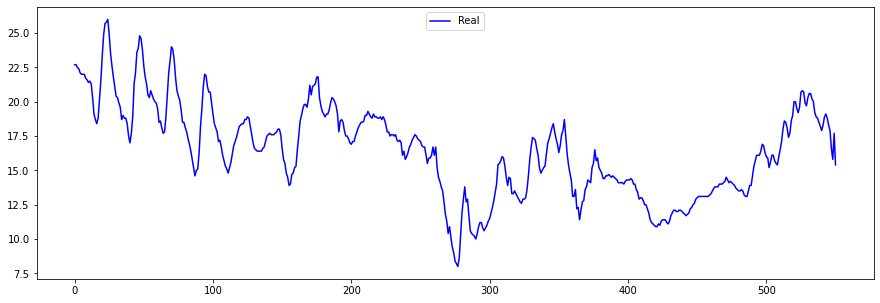

In [259]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc=9)

In [292]:
importlib.reload(utils_threshold)
importlib.reload(utils_markov)

thresholds = np.array([10., 12.5, 17.5, 22.5, 25])
order = 1
observed_states, _ = utils_threshold.discretize_thresholds(datalist, thresholds)
markov, states_dict = utils_threshold.avg_markov_from_data(1000, datalist, thresholds, noise_mean=0, noise_variance=0)

markov, states_dict

(array([[0.83333333, 0.16666667, 0.        , 0.        , 0.        ,
         0.        ],
        [0.01612903, 0.91935484, 0.06451613, 0.        , 0.        ,
         0.        ],
        [0.        , 0.01568627, 0.9372549 , 0.04705882, 0.        ,
         0.        ],
        [0.        , 0.        , 0.0631068 , 0.9223301 , 0.01456311,
         0.        ],
        [0.        , 0.        , 0.        , 0.22222222, 0.72222222,
         0.05555556],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.66666667]]),
 {'0': (-inf, 10.0),
  '1': (10.0, 12.5),
  '2': (12.5, 17.5),
  '3': (17.5, 22.5),
  '4': (22.5, 25.0),
  '5': (25.0, inf)})

# Plot

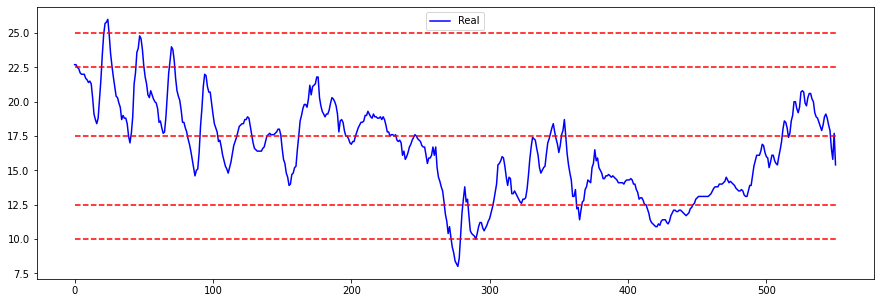

In [264]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc=9)

# plot threshold lines
for thres in thresholds:
    plt.plot(x_axis, thres*np.ones(len(x_axis)), color="r", linestyle='dashed')

# Random walks on Markov Graph

show one random walk in the future + its log-probability (not pure probability to avoid underflow)

In [265]:
states_dict

{'0': (-inf, 10.0),
 '1': (10.0, 12.5),
 '2': (12.5, 17.5),
 '3': (17.5, 22.5),
 '4': (22.5, 25.0),
 '5': (25.0, inf)}

In [274]:
utils_markov.random_walk_weighted(100, markov, observed_states)

{'log_prob': -54.39720624967379,
 'path': array([2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2], dtype=int64)}

# Predict probability at a future point using power of Markov matrix

In [298]:
# transition from last state to state i
n_ahead = 50
last_state = observed_states[-2]
print('Last state:', last_state)

ahead_markov = np.linalg.matrix_power(markov, n_ahead)
print(states_dict)
for state in states_dict.keys():
    i = int(state)
    print('probability -> state %d: %f' %(i, ahead_markov[last_state][i]))

Last state: 3
{'0': (-inf, 10.0), '1': (10.0, 12.5), '2': (12.5, 17.5), '3': (17.5, 22.5), '4': (22.5, 25.0), '5': (25.0, inf)}
probability -> state 0: 0.009769
probability -> state 1: 0.106355
probability -> state 2: 0.482395
probability -> state 3: 0.372494
probability -> state 4: 0.024807
probability -> state 5: 0.004180
